# Looking at the simulation

Here we will plot a few diagnostics to see what happens to the ice sheet during the simulation. We will focus on comparing the last time slice to the first time slice.


First, and for convenience, we will rename the first output file corresponding to year 2015.

<div class="alert alert-info">
    
<strong> Find your history output on Cheyenne (descibed above as well):</strong><br><br>
``cd /glade/scratch/$USER/archive/T_GrIS_SSP585_2015_2100/glc/hist``<br>
``ls``<br>  
     
<strong> Rename the initial_hist file to the start date and time: </strong><br><br>

``
mv T_GrIS_SSP585_2015_2100.cism.initial_hist.2015-01-01-00000.nc T_GrIS_SSP585_2015_2100.cism.h.2015-01-01-00000.nc
``

</div>

### Loading packages

In [1]:
#import xarray as xr   
import numpy as np      
import matplotlib as mpl
import matplotlib.pyplot as plt             
import matplotlib.colors as mplc
import matplotlib.cm as mcm
from netCDF4 import Dataset
import netCDF4

# to display figures in notebook after executing the code.
%matplotlib inline  

### Set your user name 

In [14]:
User = ''

### Set the 2 years you would like to compare

In [3]:
year1 = '2016'
year2 = '2101'

### Defining the path and filenames 

In [4]:
# Defining the path
path_to_file = '/glade/scratch/' + User + '/archive/T_GrIS_SSP585_2015_2100/glc/hist/'

# Defining the files to compare
file1 = path_to_file + 'T_GrIS_SSP585_2015_2100.cism.h.' + year1 + '-01-01-00000.nc'
file2 = path_to_file + 'T_GrIS_SSP585_2015_2100.cism.h.' + year2 + '-01-01-00000.nc'

# Loading the data
ncfile = Dataset(file1,'r')
thk1 = np.squeeze(ncfile.variables["thk"][0,:,:])        # ice thickness
artm1 = np.squeeze(ncfile.variables["artm"][0,:,:])      # air temperature
smb1 = np.squeeze(ncfile.variables["smb"][0,:,:])/1000.  # surface mass balance, switching the units from mm/yr w.e. to m/yr w.e
ncfile.close()

ncfile = Dataset(file2,'r')
thk2 = np.squeeze(ncfile.variables["thk"][0,:,:])
artm2 = np.squeeze(ncfile.variables["artm"][0,:,:])
smb2 = np.squeeze(ncfile.variables["smb"][0,:,:])/1000.    # switching the units from mm/yr w.e. to m/yr w.e
ncfile.close()

# Computing the differences in the different variables
diff_thk  = thk2 - thk1    # thickness difference
diff_artm = artm2 - artm1  # air temperature difference
diff_smb  = smb2 - smb1    # SMB difference

## Looking at 2D plots

**Note:**
In these plots, you can adjust the range of the colorbars by adjusting the "vmin" and "vmax" values of each subplot.

### Air temperature

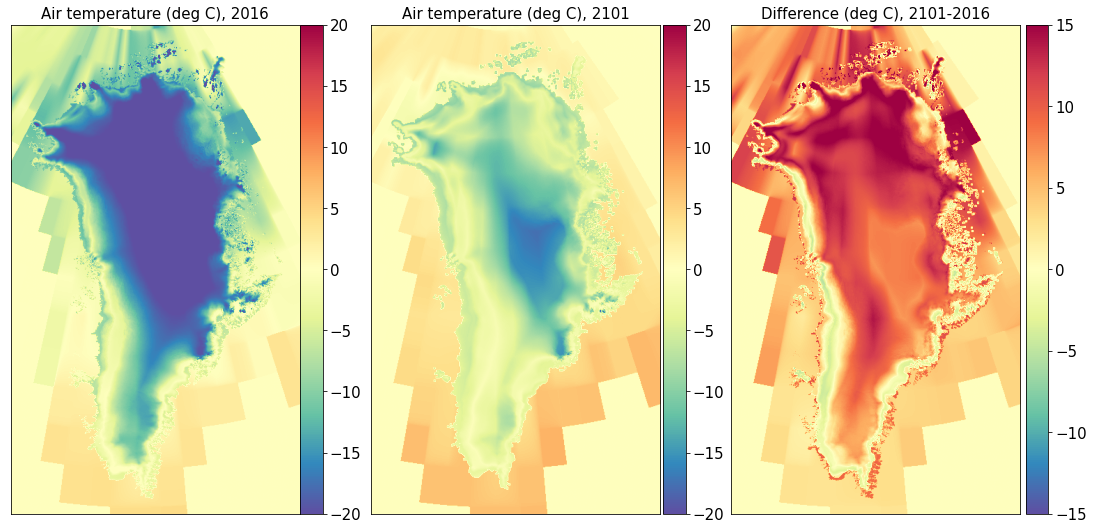

In [7]:
labelsize=15

my_cmap = mcm.get_cmap('Spectral_r')


fig, ax = plt.subplots(1, 3, sharey=True, figsize=[21, 9])


# Plotting air temperature for year1

vmin = -20
vmax = 20

last_panel0 = ax[0].imshow(artm1, vmin=vmin, vmax=vmax,
                       cmap=my_cmap)

title0 = 'Air temperature (deg C), ' + year1 
ax[0].set_title(title0, fontsize=labelsize)

fig.subplots_adjust(right=0.8)

pos = ax[0].get_position()
cax = fig.add_axes([0.32, pos.y0, 0.015, pos.y1 - pos.y0])
cbar = fig.colorbar(last_panel0,cax=cax)
cbar.ax.tick_params(labelsize=labelsize)
cbar.ax.get_yaxis().labelpad = 15



# Plotting air temperature for year2

last_panel1 = ax[1].imshow(artm2, vmin=vmin, vmax=vmax,
                       cmap=my_cmap)

title1 = 'Air temperature (deg C), ' + year2 

ax[1].set_title(title1, fontsize=labelsize)

pos = ax[1].get_position()
cax = fig.add_axes([0.56, pos.y0, 0.015, pos.y1 - pos.y0])
cbar = fig.colorbar(last_panel1,cax=cax)
cbar.ax.tick_params(labelsize=labelsize)
cbar.ax.get_yaxis().labelpad = 15



# Plotting the difference in air temperature


vmin = -15
vmax = 15

last_panel2 = ax[2].imshow(diff_artm, vmin=vmin, vmax=vmax,
                       cmap=my_cmap)

title2 = 'Difference (deg C), ' + year2 + '-' + year1 
ax[2].set_title(title2, fontsize=labelsize)
pos = ax[2].get_position()
cax = fig.add_axes([0.8, pos.y0, 0.015, pos.y1 - pos.y0])
cbar = fig.colorbar(last_panel2,cax=cax)
cbar.ax.tick_params(labelsize=labelsize)


for i in range(len(ax)):
    ax[i].invert_yaxis()
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xticklabels('')
    ax[i].set_yticklabels('')
    ax[i].set_xticks([])
    ax[i].set_yticks([])



### Surface mass balance

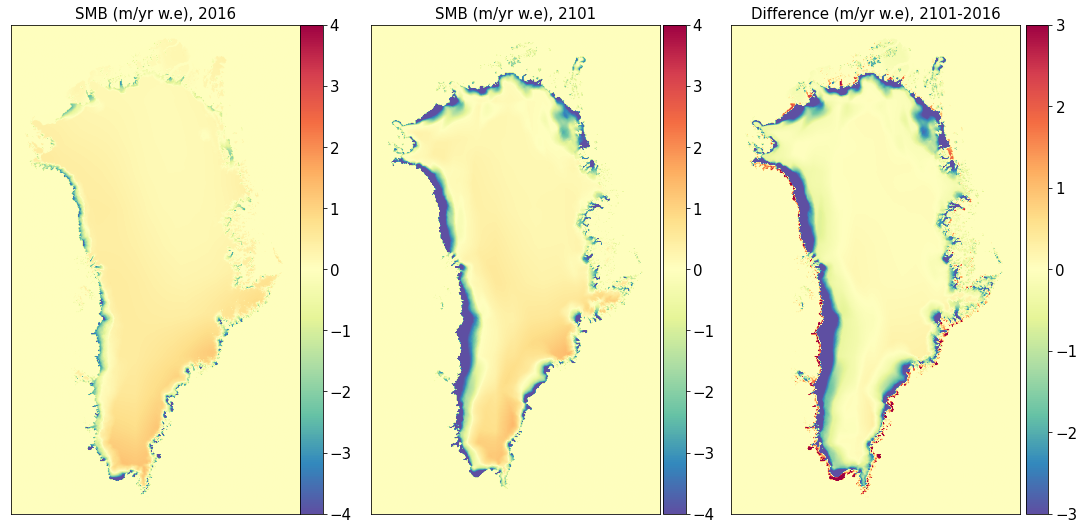

In [9]:
labelsize=15

my_cmap = mcm.get_cmap('Spectral_r')


fig, ax = plt.subplots(1, 3, sharey=True, figsize=[21, 9])


# Plotting SMB for year1

vmin = -4
vmax = 4

last_panel0 = ax[0].imshow(smb1, vmin=vmin, vmax=vmax,
                       cmap=my_cmap)

title0 = 'SMB (m/yr w.e), ' + year1 

ax[0].set_title(title0, fontsize=labelsize)


fig.subplots_adjust(right=0.8)

pos = ax[0].get_position()
cax = fig.add_axes([0.32, pos.y0, 0.015, pos.y1 - pos.y0])

cbar = fig.colorbar(last_panel0,cax=cax)
cbar.ax.tick_params(labelsize=labelsize)

cbar.ax.get_yaxis().labelpad = 15



# Plotting SMB for year2

last_panel1 = ax[1].imshow(smb2, vmin=vmin, vmax=vmax,
                       cmap=my_cmap)

title1 = 'SMB (m/yr w.e), ' + year2 

ax[1].set_title(title1, fontsize=labelsize)
pos = ax[1].get_position()
cax = fig.add_axes([0.56, pos.y0, 0.015, pos.y1 - pos.y0])
cbar = fig.colorbar(last_panel1,cax=cax)
cbar.ax.tick_params(labelsize=labelsize)
cbar.ax.get_yaxis().labelpad = 15



# Plotting the difference in SMB


vmin = -3
vmax = 3

last_panel2 = ax[2].imshow(diff_smb, vmin=vmin, vmax=vmax,
                       cmap=my_cmap)

title2 = 'Difference (m/yr w.e), ' + year2 + '-' + year1 

ax[2].set_title(title2, fontsize=labelsize)


pos = ax[2].get_position()
cax = fig.add_axes([0.8, pos.y0, 0.015, pos.y1 - pos.y0])
cbar = fig.colorbar(last_panel2,cax=cax)
cbar.ax.tick_params(labelsize=labelsize)


for i in range(len(ax)):
    ax[i].invert_yaxis()
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xticklabels('')
    ax[i].set_yticklabels('')
    ax[i].set_xticks([])
    ax[i].set_yticks([])



### Ice Thickness

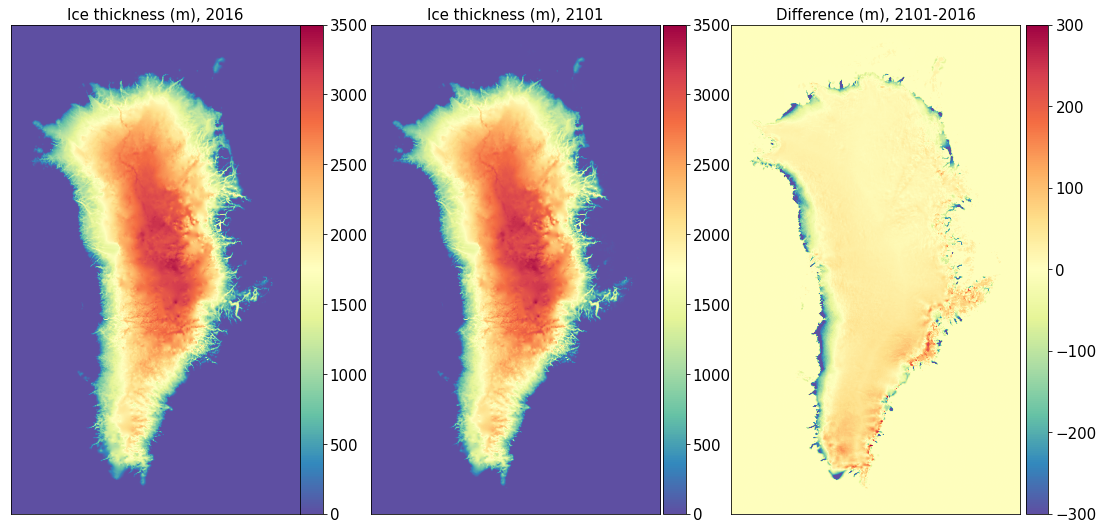

In [11]:
labelsize=15
my_cmap = mcm.get_cmap('Spectral_r')


fig, ax = plt.subplots(1, 3, sharey=True, figsize=[21, 9])

# Plotting thickness for year1

vmin = 0
vmax = 3500

last_panel0 = ax[0].imshow(thk1, vmin=vmin, vmax=vmax,
                       cmap=my_cmap)

title0 = 'Ice thickness (m), ' + year1 
ax[0].set_title(title0, fontsize=labelsize)

fig.subplots_adjust(right=0.8)

pos = ax[0].get_position()
cax = fig.add_axes([0.32, pos.y0, 0.015, pos.y1 - pos.y0])

cbar = fig.colorbar(last_panel0,cax=cax)
cbar.ax.tick_params(labelsize=labelsize)

cbar.ax.get_yaxis().labelpad = 15



# Plotting thickness for year2

last_panel1 = ax[1].imshow(thk2, vmin=vmin, vmax=vmax,
                       cmap=my_cmap)

title1 = 'Ice thickness (m), ' + year2 

ax[1].set_title(title1, fontsize=labelsize)

pos = ax[1].get_position()
cax = fig.add_axes([0.56, pos.y0, 0.015, pos.y1 - pos.y0])
cbar = fig.colorbar(last_panel1,cax=cax)
cbar.ax.tick_params(labelsize=labelsize)
cbar.ax.get_yaxis().labelpad = 15



# Plotting the difference in ice thickness

vmin = -300
vmax = 300

last_panel2 = ax[2].imshow(diff_thk, vmin=vmin, vmax=vmax,
                       cmap=my_cmap)

title2 = 'Difference (m), ' + year2 + '-' + year1 

ax[2].set_title(title2, fontsize=labelsize)
pos = ax[2].get_position()
cax = fig.add_axes([0.8, pos.y0, 0.015, pos.y1 - pos.y0])
cbar = fig.colorbar(last_panel2,cax=cax)
cbar.ax.tick_params(labelsize=labelsize)


for i in range(len(ax)):
    ax[i].invert_yaxis()
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xticklabels('')
    ax[i].set_yticklabels('')
    ax[i].set_xticks([])
    ax[i].set_yticks([])


## Looking at time series
Each output history file contains a few scalars that give information about the state of the ice sheet. Here we are going to look at:
- the grounded ice area
- the ice mass
- the ice mass above flotation

<div class="alert alert-info">
<strong> Combining all time for each scalar in a single time series file </strong><br><br>

While we could create an array using python for each scalar by looping through every single file, it is convenient to extract them in their own file using nco. 
To do this we will use the command "ncrcat"
    
On Cheyenne:  
```
module load nco
```
    
**For mass**
```
ncrcat -v imass T_GrIS_SSP585_2015_2100.cism.h.*.nc mass.nc
```

**For grounded ice area**
```
ncrcat -v iareag T_GrIS_SSP585_2015_2100.cism.h.*.nc area_ground.nc
```

</div>

Now we can look at the time series evolution

In [12]:
# Loading the variables
file_mass = path_to_file + "mass.nc"
file_areag = path_to_file + "area_ground.nc"

ncfile = Dataset(file_mass,'r')
mass = ncfile.variables["imass"][:]
time_mass = ncfile.variables["time"][:]
ncfile.close()

ncfile = Dataset(file_areag,'r')
area = ncfile.variables["iareag"][:]
time_area = ncfile.variables["time"][:]
ncfile.close()

Text(0.5, 1.0, 'Ice area evolution (m2)')

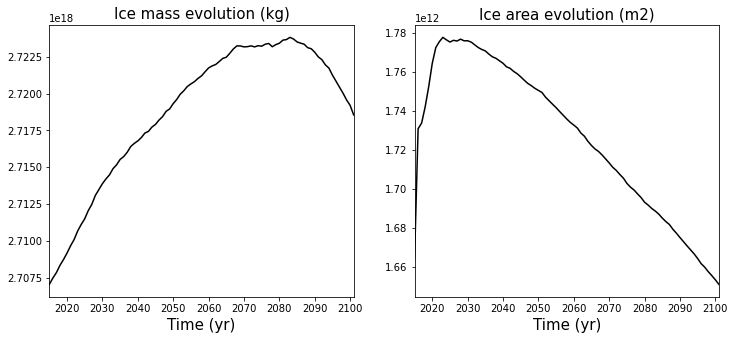

In [ ]:
labelsize=15

timemin = 2015
timemax = 2101

color = 'black'
line = '-'

plt.figure(figsize=(12,5))

# Plotting the Ice mass evolution time series

plt.subplot(121)
plt.plot(time_mass, mass, line, ms=3, mfc=color, color=color)
plt.xlim([timemin, timemax])
plt.xlabel('Time (yr)', multialignment='center',fontsize=labelsize)
plt.title('Ice mass evolution (kg)',fontsize=labelsize)


# Plotting the Ice area evolution time series

plt.subplot(122)
plt.plot(time_area, area, line, ms=3, mfc=color, color=color)
plt.xlim([timemin, timemax])
plt.xlabel('Time (yr)', multialignment='center',fontsize=labelsize)
plt.title('Ice area evolution (m2)',fontsize=labelsize)